# Notebook Intended for New Users

## Import required packages

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]  # resize figures

sns.set(style='darkgrid')  # style of plot (dark grey background, etc)

## Import classes from correct directory

In [3]:
import sys
sys.path.append("..")
import AdvEMDpy
from emd_hilbert import theta, omega, hilbert_spectrum, Hilbert

### Create example time series

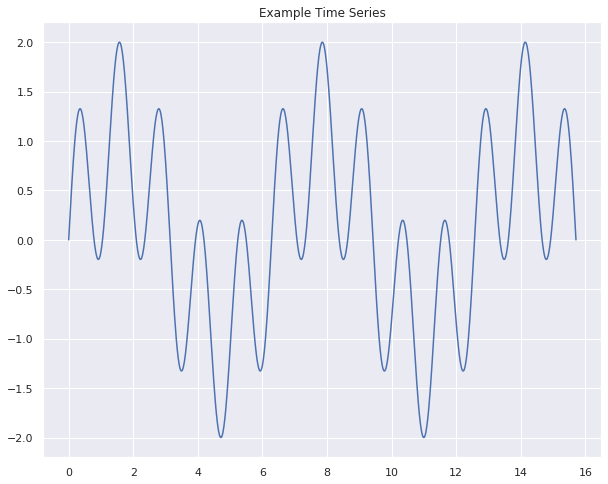

In [4]:
time = np.linspace(0, 5 * np.pi, 1001)  # remember this time associated with time series
time_series = np.sin(time) + np.sin(5 * time)
plt.plot(time, time_series)
plt.title('Example Time Series')
plt.show()

### Decompose time series using Empirical Mode Decomposition

Optional keyword arguments (time, knots, knot_time) not included for demonstration

In [5]:
emd = AdvEMDpy.EMD(time_series=time_series)
emd_imfs, emd_hts, emd_ifs, _, _, _, _ = emd.empirical_mode_decomposition()

IMF_11 Standard deviation STOPPING CRITERION NOT MET with sd = 174.15
IMF_12 ALL IMF CONDITIONS MET
IMF_21 Standard deviation STOPPING CRITERION NOT MET with sd = 222902.44
IMF_22 Standard deviation STOPPING CRITERION NOT MET with sd = 19457.25
IMF_23 Standard deviation STOPPING CRITERION NOT MET with sd = 31738.65
IMF_24 Standard deviation STOPPING CRITERION NOT MET with sd = 848.38
IMF_25 Standard deviation STOPPING CRITERION NOT MET with sd = 111.55
IMF_26 ALL IMF CONDITIONS MET
IMF_31 ALL IMF CONDITIONS MET


Choose not to have success or failure of each step of EMD printed (note no output)

In [6]:
emd_imfs, emd_hts, emd_ifs, _, _, _, _ = emd.empirical_mode_decomposition(verbose=False)

Choose to plot incremental debugging plots demonstrating sifting (note figures output and last figure in particular)

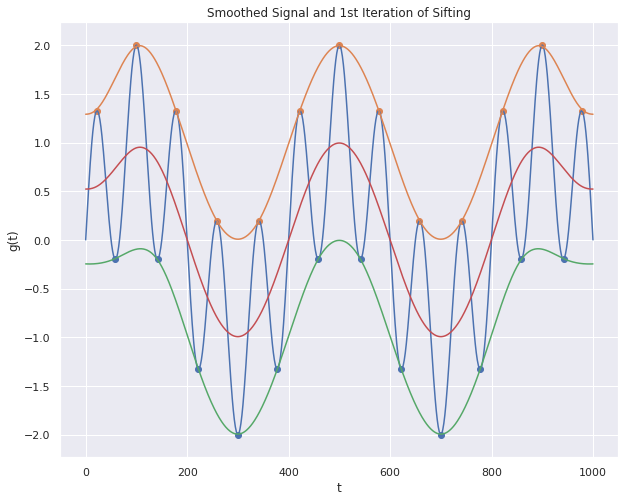

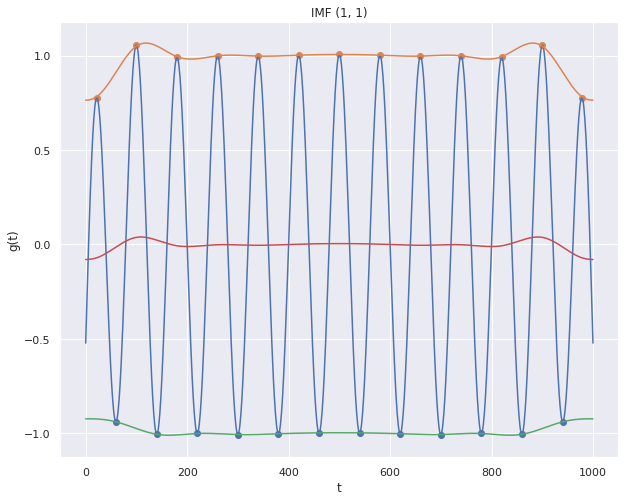

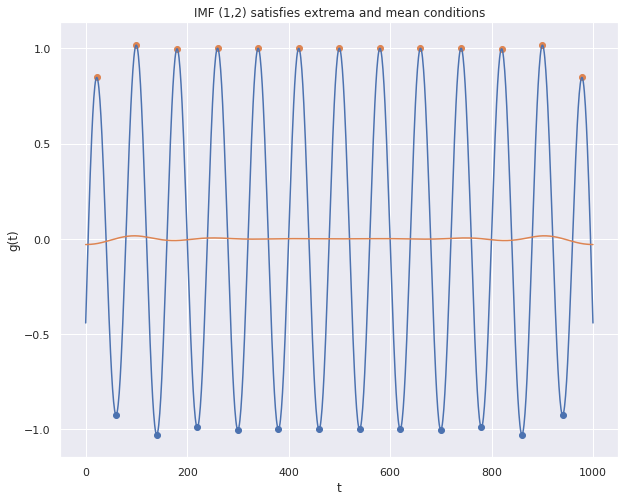

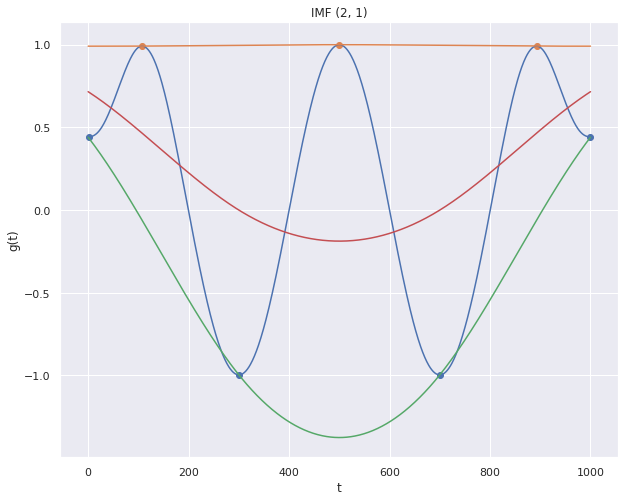

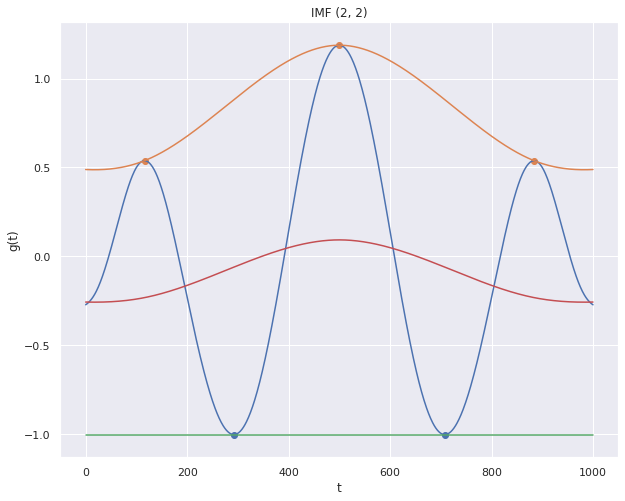

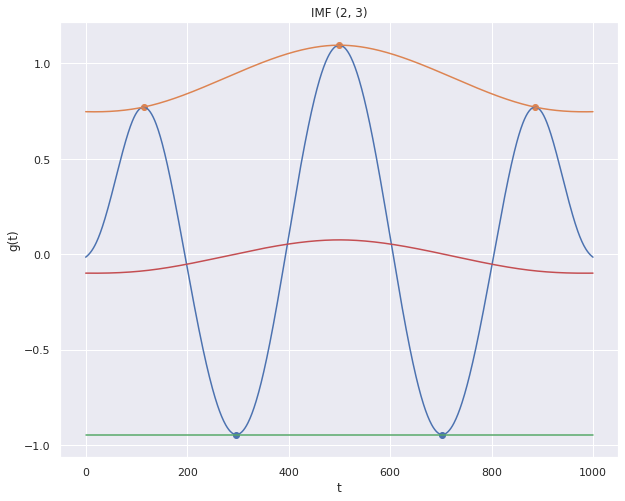

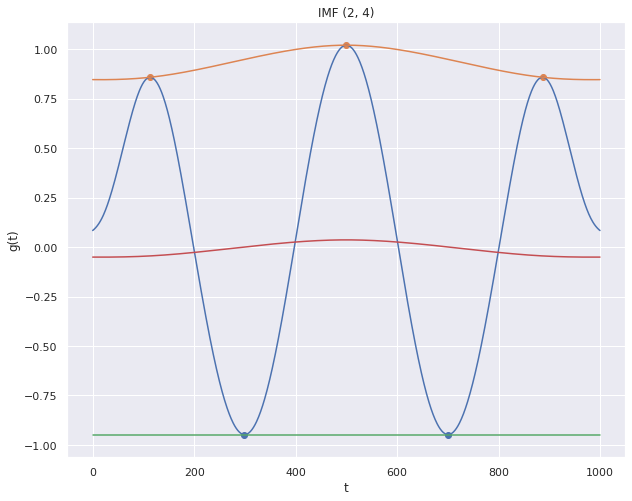

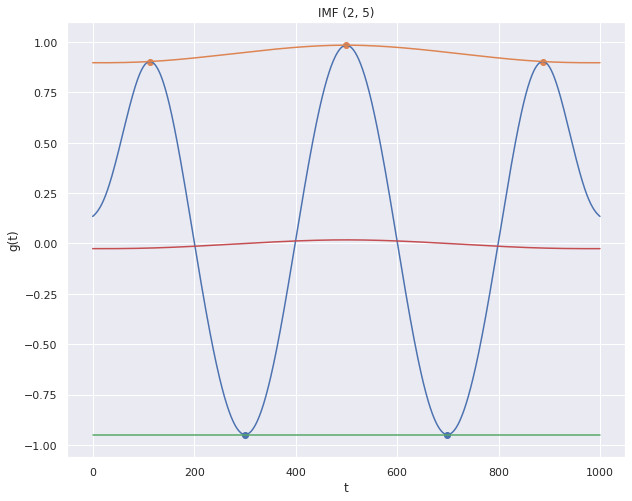

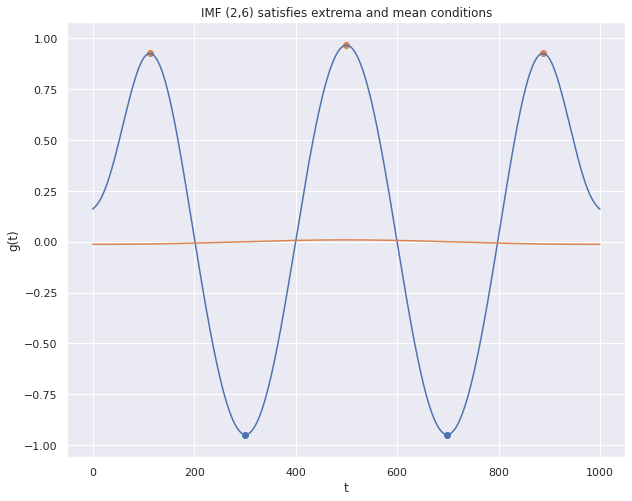

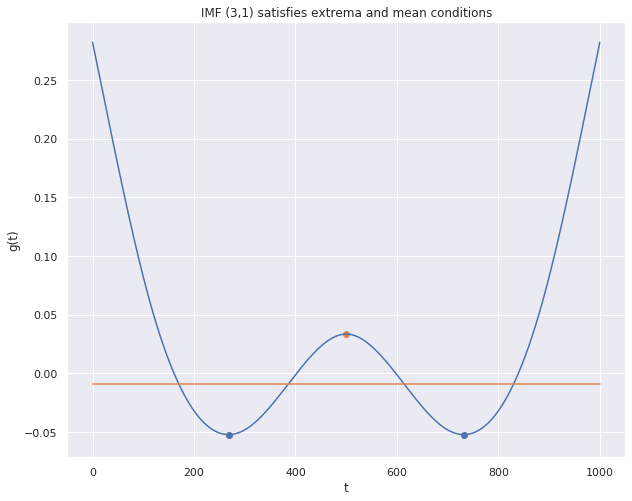

In [7]:
emd_imfs, emd_hts, emd_ifs, _, _, _, _ = emd.empirical_mode_decomposition(verbose=False, debug=True)

### Plot IMF 1 and IMF 2 alongside true underlying structures

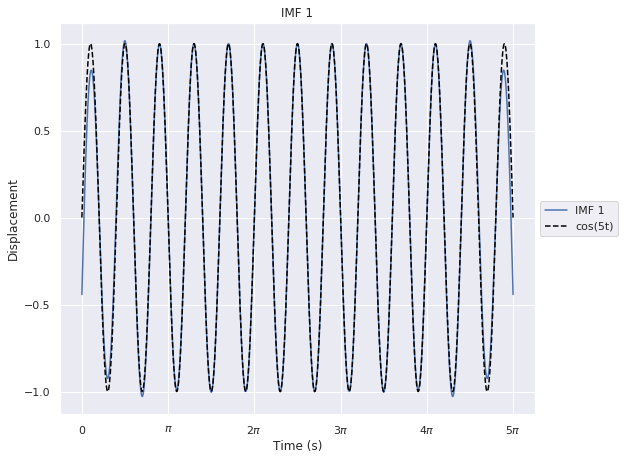

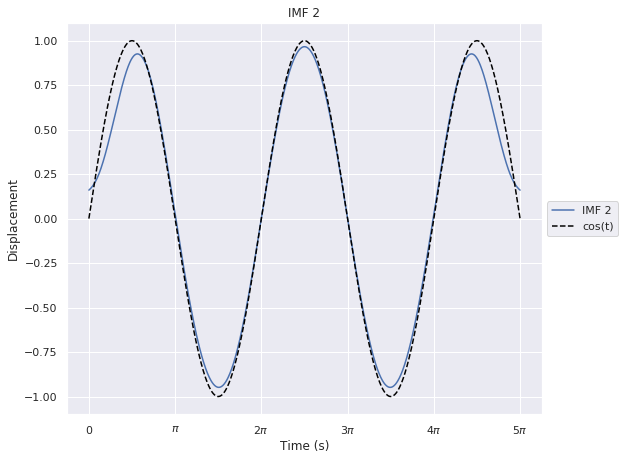

In [8]:
ax = plt.subplot(111)
plt.title('IMF 1')
plt.plot(time, emd_imfs[1, :], label='IMF 1')
plt.plot(time, np.sin(5 * time), '--', c='black', label='cos(5t)')
plt.xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi, 5 * np.pi], ['$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$', r'$5\pi$'])
plt.xlabel('Time (s)')
plt.ylabel('Displacement')
box_0 = ax.get_position()
ax.set_position([box_0.x0, box_0.y0 + 0.05, box_0.width * 0.85, box_0.height * 0.9])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
ax = plt.subplot(111)
plt.title('IMF 2')
plt.plot(time, emd_imfs[2, :], label='IMF 2')
plt.plot(time, np.sin(time), '--', c='black', label='cos(t)')
plt.xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi, 5 * np.pi], ['$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$', r'$5\pi$'])
plt.xlabel('Time (s)')
plt.ylabel('Displacement')
box_0 = ax.get_position()
ax.set_position([box_0.x0, box_0.y0 + 0.05, box_0.width * 0.85, box_0.height * 0.9])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [9]:
print(f'Sum of absolute errors for IMF 1: {sum(np.abs(emd_imfs[1, :] - np.sin(5 * time)))}')
print(f'Sum of absolute errors for IMF 2: {sum(np.abs(emd_imfs[2, :] - np.sin(time)))}')

Sum of absolute errors for IMF 1: 25.755774543205373
Sum of absolute errors for IMF 2: 55.74642305225602


### Plot Hilbert spectrum for demonstration purposes

In [10]:
hs_outputs = hilbert_spectrum(time, emd_imfs, emd_hts, emd_ifs, max_frequency=6, plot=False)

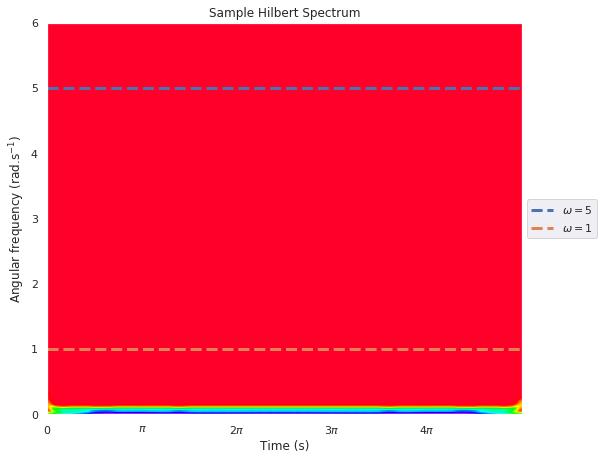

In [11]:
ax = plt.subplot(111)
plt.title('Sample Hilbert Spectrum')
x_hs, y, z = hs_outputs
z_min, z_max = 0, np.abs(z).max()
ax.pcolormesh(x_hs, y, np.abs(z), cmap='gist_rainbow', vmin=z_min, vmax=z_max)
ax.plot(x_hs[0, :], 5 * np.ones_like(x_hs[0, :]), '--', label=r'$\omega = 5$', Linewidth=3)
ax.plot(x_hs[0, :], 1 * np.ones_like(x_hs[0, :]), '--', label=r'$\omega = 1$', Linewidth=3)
ax.set_xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi])
ax.set_xticklabels(['$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$'])
plt.ylabel(r'Angular frequency (rad.s$^{-1}$)')
plt.xlabel('Time (s)')
box_0 = ax.get_position()
ax.set_position([box_0.x0, box_0.y0 + 0.05, box_0.width * 0.85, box_0.height * 0.9])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Why is this wrong?

This has happened because with no "time" keyword argument, the instantaneous frequency was calculated in terms of the default time of:

self.time = np.arange(len(self.time_series))

This can be fixed in two ways:

(1) multiply instantaneous frequency by appropriate factor, or

(2) input optional time keyword argument.

### (1)

In [12]:
hs_outputs = hilbert_spectrum(time, emd_imfs, emd_hts, emd_ifs * (len(time_series) / time[-1]), max_frequency=6, plot=False)

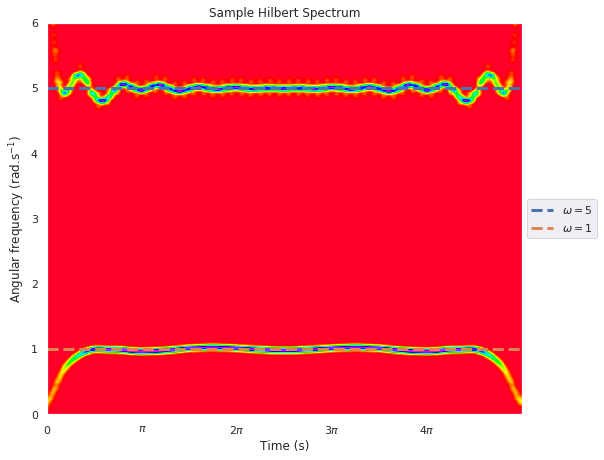

In [13]:
ax = plt.subplot(111)
plt.title('Sample Hilbert Spectrum')
x_hs, y, z = hs_outputs
z_min, z_max = 0, np.abs(z).max()
ax.pcolormesh(x_hs, y, np.abs(z), cmap='gist_rainbow', vmin=z_min, vmax=z_max)
ax.plot(x_hs[0, :], 5 * np.ones_like(x_hs[0, :]), '--', label=r'$\omega = 5$', Linewidth=3)
ax.plot(x_hs[0, :], 1 * np.ones_like(x_hs[0, :]), '--', label=r'$\omega = 1$', Linewidth=3)
ax.set_xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi])
ax.set_xticklabels(['$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$'])
plt.ylabel(r'Angular frequency (rad.s$^{-1}$)')
plt.xlabel('Time (s)')
box_0 = ax.get_position()
ax.set_position([box_0.x0, box_0.y0 + 0.05, box_0.width * 0.85, box_0.height * 0.9])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### (2)

In [14]:
emd = AdvEMDpy.EMD(time=time, time_series=time_series)  # note the inclusion of optional "time" keyword argument
emd_imfs, emd_hts, emd_ifs, _, _, _, _ = emd.empirical_mode_decomposition(verbose=True)
hs_outputs = hilbert_spectrum(time, emd_imfs, emd_hts, emd_ifs, max_frequency=6, plot=False)

IMF_11 Standard deviation STOPPING CRITERION NOT MET with sd = 174.15
IMF_12 ALL IMF CONDITIONS MET
IMF_21 Standard deviation STOPPING CRITERION NOT MET with sd = 222902.44
IMF_22 Standard deviation STOPPING CRITERION NOT MET with sd = 19457.25
IMF_23 Standard deviation STOPPING CRITERION NOT MET with sd = 31738.65
IMF_24 Standard deviation STOPPING CRITERION NOT MET with sd = 848.38
IMF_25 Standard deviation STOPPING CRITERION NOT MET with sd = 111.55
IMF_26 ALL IMF CONDITIONS MET
IMF_31 ALL IMF CONDITIONS MET


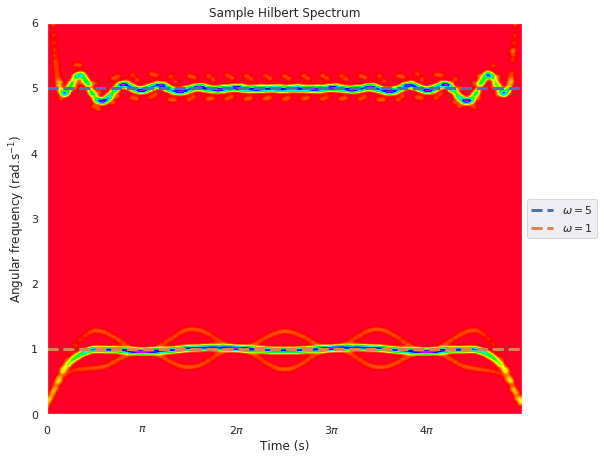

In [15]:
ax = plt.subplot(111)
plt.title('Sample Hilbert Spectrum')
x_hs, y, z = hs_outputs
z_min, z_max = 0, np.abs(z).max()
ax.pcolormesh(x_hs, y, np.abs(z), cmap='gist_rainbow', vmin=z_min, vmax=z_max)
ax.plot(x_hs[0, :], 5 * np.ones_like(x_hs[0, :]), '--', label=r'$\omega = 5$', Linewidth=3)
ax.plot(x_hs[0, :], 1 * np.ones_like(x_hs[0, :]), '--', label=r'$\omega = 1$', Linewidth=3)
ax.set_xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi])
ax.set_xticklabels(['$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$'])
plt.ylabel(r'Angular frequency (rad.s$^{-1}$)')
plt.xlabel('Time (s)')
box_0 = ax.get_position()
ax.set_position([box_0.x0, box_0.y0 + 0.05, box_0.width * 0.85, box_0.height * 0.9])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### For consistency and good practice please use (2)

## Algorithmic variations to improve analysis

The default edge effect is the Symmetric edge effect. This implies that in order to deal with the edges of the time series, the time series is assumed to continue as follows:

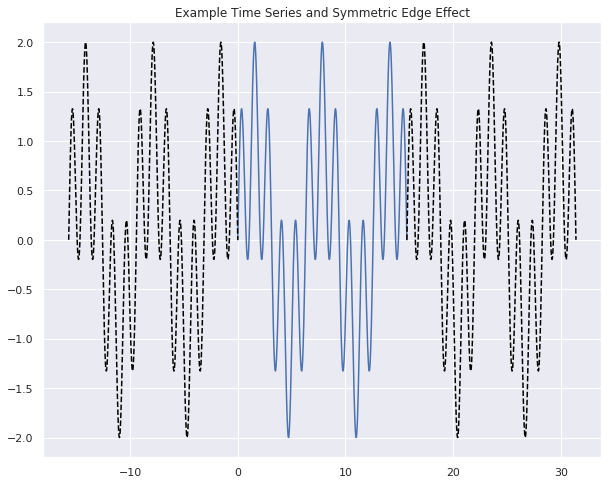

In [16]:
time = np.linspace(0, 5 * np.pi, 1001)
time_left = np.linspace(-5 * np.pi, 0, 1001)
time_right = np.linspace(5 * np.pi, 10 * np.pi, 1001)
time_series = np.sin(time) + np.sin(5 * time)
time_series_left_extension = time_series
time_series_right_extension = time_series
plt.plot(time, time_series, label='Time series')
plt.plot(time_left, time_series_left_extension, '--', c='black', label='Symmetric left')
plt.plot(time_right, time_series_right_extension, '--', c='black', label='Symmetric right')
plt.title('Example Time Series and Symmetric Edge Effect')
plt.show()

One can see that this, while symmetrically pleasing in a way, does not reflect the true picture and as a result, nonsensical IMFs and error propogation will result.

Should one rather assume an anti-symmetric edge effect such that:

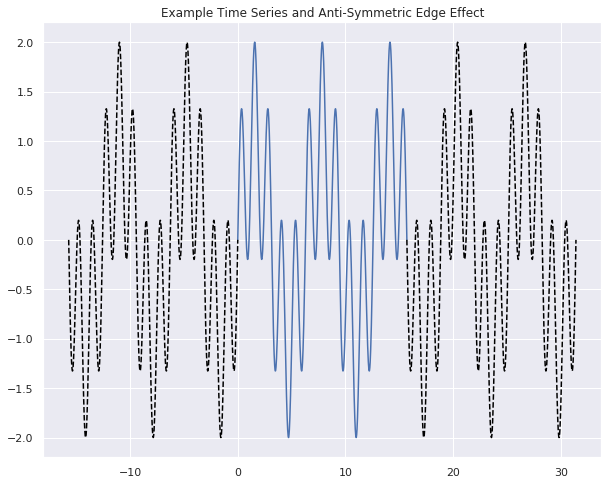

In [17]:
time = np.linspace(0, 5 * np.pi, 1001)
time_left = np.linspace(-5 * np.pi, 0, 1001)
time_right = np.linspace(5 * np.pi, 10 * np.pi, 1001)
time_series = np.sin(time) + np.sin(5 * time)
time_series_left_extension = -time_series
time_series_right_extension = -time_series
plt.plot(time, time_series, label='Time series')
plt.plot(time_left, time_series_left_extension, '--', c='black', label='Anti-symmetric left')
plt.plot(time_right, time_series_right_extension, '--', c='black', label='Anti-symmetric right')
plt.title('Example Time Series and Anti-Symmetric Edge Effect')
plt.show()

On can see that this is much closer to the true underlying time series structure.

Now process as before with the anti-symmetric edge effect.

In [18]:
emd_imfs, emd_hts, emd_ifs, _, _, _, _ = emd.empirical_mode_decomposition(verbose=False, edge_effect='anti-symmetric')
hs_outputs = hilbert_spectrum(time, emd_imfs, emd_hts, emd_ifs, max_frequency=6, plot=False)

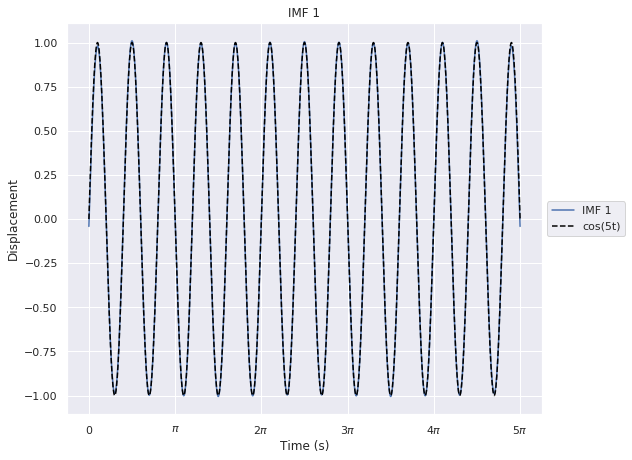

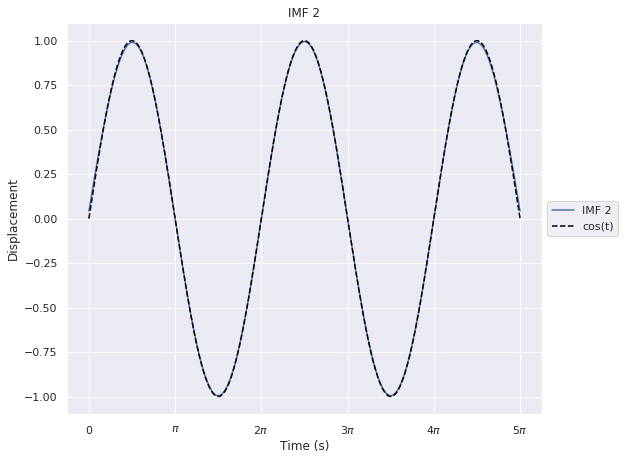

In [19]:
ax = plt.subplot(111)
plt.title('IMF 1')
plt.plot(time, emd_imfs[1, :], label='IMF 1')
plt.plot(time, np.sin(5 * time), '--', c='black', label='cos(5t)')
plt.xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi, 5 * np.pi], ['$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$', r'$5\pi$'])
plt.xlabel('Time (s)')
plt.ylabel('Displacement')
box_0 = ax.get_position()
ax.set_position([box_0.x0, box_0.y0 + 0.05, box_0.width * 0.85, box_0.height * 0.9])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
ax = plt.subplot(111)
plt.title('IMF 2')
plt.plot(time, emd_imfs[2, :], label='IMF 2')
plt.plot(time, np.sin(time), '--', c='black', label='cos(t)')
plt.xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi, 5 * np.pi], ['$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$', r'$5\pi$'])
plt.xlabel('Time (s)')
plt.ylabel('Displacement')
box_0 = ax.get_position()
ax.set_position([box_0.x0, box_0.y0 + 0.05, box_0.width * 0.85, box_0.height * 0.9])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [20]:
print(f'Sum of absolute errors for IMF 1: {sum(np.abs(emd_imfs[1, :] - np.sin(5 * time)))}')
print(f'Sum of absolute errors for IMF 2: {sum(np.abs(emd_imfs[2, :] - np.sin(time)))}')

Sum of absolute errors for IMF 1: 5.181506074762154
Sum of absolute errors for IMF 2: 5.166787771011835


### Plot Hilbert spectrum for demonstration purposes

In [21]:
hs_outputs = hilbert_spectrum(time, emd_imfs, emd_hts, emd_ifs, max_frequency=6, plot=False, which_imfs=[1, 2])

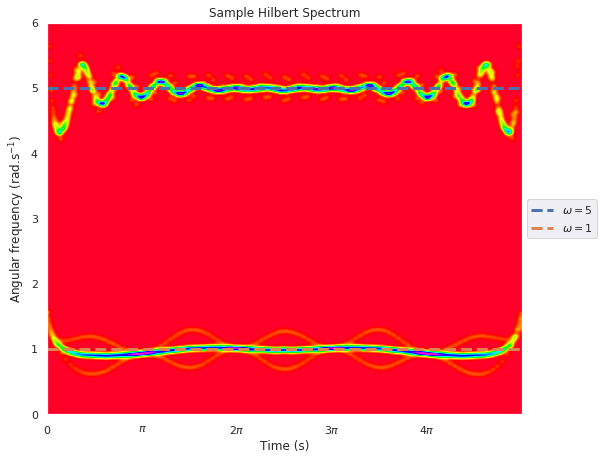

In [22]:
ax = plt.subplot(111)
plt.title('Sample Hilbert Spectrum')
x_hs, y, z = hs_outputs
z_min, z_max = 0, np.abs(z).max()
ax.pcolormesh(x_hs, y, np.abs(z), cmap='gist_rainbow', vmin=z_min, vmax=z_max)
ax.plot(x_hs[0, :], 5 * np.ones_like(x_hs[0, :]), '--', label=r'$\omega = 5$', Linewidth=3)
ax.plot(x_hs[0, :], 1 * np.ones_like(x_hs[0, :]), '--', label=r'$\omega = 1$', Linewidth=3)
ax.set_xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi])
ax.set_xticklabels(['$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$'])
plt.ylabel(r'Angular frequency (rad.s$^{-1}$)')
plt.xlabel('Time (s)')
box_0 = ax.get_position()
ax.set_position([box_0.x0, box_0.y0 + 0.05, box_0.width * 0.85, box_0.height * 0.9])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Despite the increased accuracy of the resolution of the structures, the edge effect is still observable (to a lesser extent)

This is as a result of the inverse tan function used to calculate the angular speed - this is very sensitive to even slight deviations

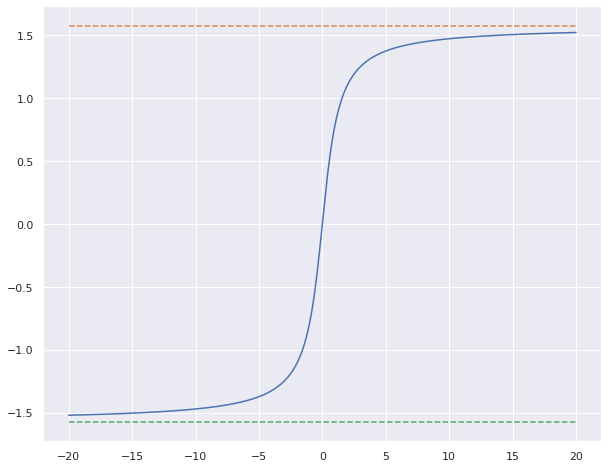

In [23]:
tan_time = np.linspace(-20, 20, 401)
inverse_tan = np.arctan(tan_time)
plt.plot(tan_time, inverse_tan)
plt.plot(tan_time, (np.pi / 2) * np.ones_like(tan_time), '--')
plt.plot(tan_time, -(np.pi / 2) * np.ones_like(tan_time), '--')
plt.show()

The Hilbert transform of an IMF is calculated as follows

\begin{equation}
\check{\gamma}_k(t) = \frac{1}{\pi}\lim_{\epsilon\rightarrow{0}^+}\bigg[\int_{t - \frac{1}{\epsilon}}^{t - \epsilon}\frac{\gamma_k(t^*)}{t - t^*}dt^* + \int_{t^* + \epsilon}^{t + \frac{1}{\epsilon}}\frac{\gamma_k(t^*)}{t - t^*}dt^*\bigg].
\end{equation}

Once the Hilbert transform is calculated, the angular displacement is calculated

\begin{equation}
\theta_k(t) = \mbox{tan}^{-1}\left(\frac{\check{\gamma}_k(t)}{\gamma_k(t)}\right).
\end{equation}

Finally, the angular frequency is calculated

\begin{equation}
\omega_k(t) = \frac{d\theta_k(t)}{dt}.
\end{equation}

One can see from the plot of the inverse tangent function above that it is extremely sensitive to even the slightest deviations (owing to the steep gradient about zero)

As a side note, some of these properties make it ideal as an activation function in neural networks

### Perfect frequency resolution

In [24]:
imf_1 = np.sin(5 * time)
ht_imf_1 = -np.cos(5 * time)
angular_displacement_imf_1 = theta(imf_1, ht_imf_1)
if_imf_1 = omega(time, angular_displacement_imf_1)

imf_2 = np.sin(time)
ht_imf_2 = -np.cos(time)
angular_displacement_imf_2 = theta(imf_2, ht_imf_2)
if_imf_2 = omega(time, angular_displacement_imf_2)

hs_outputs = hilbert_spectrum(time, np.vstack((np.zeros_like(imf_1), imf_1, imf_2)), 
                              np.vstack((np.zeros_like(ht_imf_1), ht_imf_1, ht_imf_2)), 
                              np.vstack((np.zeros_like(if_imf_1), if_imf_1, if_imf_2)), 
                              max_frequency=6, plot=False, which_imfs=[1, 2])

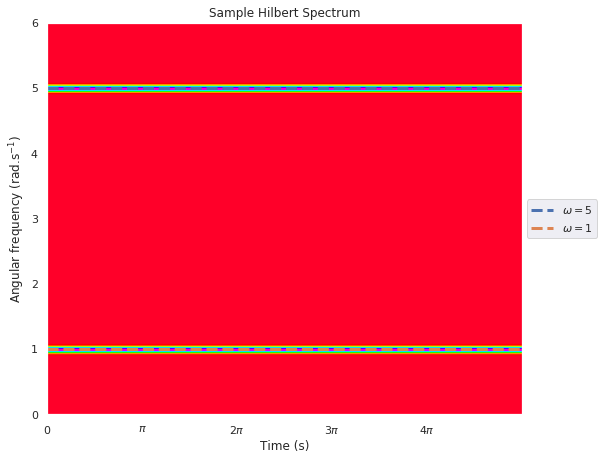

In [25]:
ax = plt.subplot(111)
plt.title('Sample Hilbert Spectrum')
x_hs, y, z = hs_outputs
z_min, z_max = 0, np.abs(z).max()
ax.pcolormesh(x_hs, y, np.abs(z), cmap='gist_rainbow', vmin=z_min, vmax=z_max)
ax.plot(x_hs[0, :], 5 * np.ones_like(x_hs[0, :]), '--', label=r'$\omega = 5$', Linewidth=3)
ax.plot(x_hs[0, :], 1 * np.ones_like(x_hs[0, :]), '--', label=r'$\omega = 1$', Linewidth=3)
ax.set_xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi])
ax.set_xticklabels(['$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$'])
plt.ylabel(r'Angular frequency (rad.s$^{-1}$)')
plt.xlabel('Time (s)')
box_0 = ax.get_position()
ax.set_position([box_0.x0, box_0.y0 + 0.05, box_0.width * 0.85, box_0.height * 0.9])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Alternate Time Series Analysis Methods for Comparison

## Short-Time Fourier Transform (STFT)

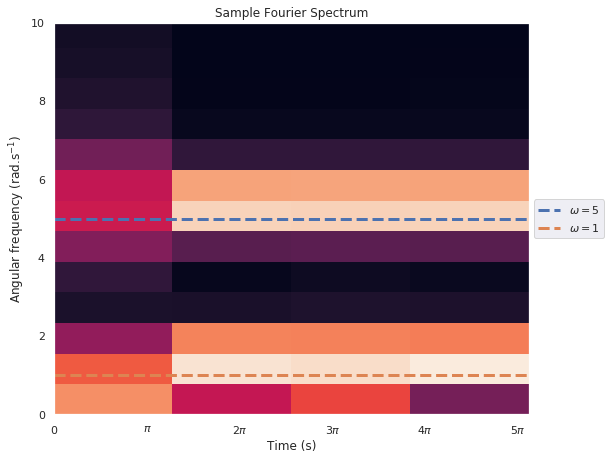

In [26]:
hilbert = Hilbert(time=time, time_series=time_series)
stft_outputs = hilbert.stft_custom(window_width=512)
x_hs, y, z = stft_outputs
z_min, z_max = 0, np.abs(z).max()

ax = plt.subplot(111)
plt.title('Sample Fourier Spectrum')
ax.pcolormesh(x_hs, y, np.abs(z), vmin=z_min, vmax=z_max)
ax.plot(x_hs, 5 * np.ones_like(x_hs), '--', label=r'$\omega = 5$', Linewidth=3)
ax.plot(x_hs, 1 * np.ones_like(x_hs), '--', label=r'$\omega = 1$', Linewidth=3)
ax.set_xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi, 5 * np.pi])
ax.set_xticklabels(['$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$', r'$5\pi$'])
plt.ylabel(r'Angular frequency (rad.s$^{-1}$)')
plt.ylim(0, 10)
plt.xlabel('Time (s)')
box_0 = ax.get_position()
ax.set_position([box_0.x0, box_0.y0 + 0.05, box_0.width * 0.85, box_0.height * 0.9])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Morlet Window Transform (MWT) with fixed wavelet width

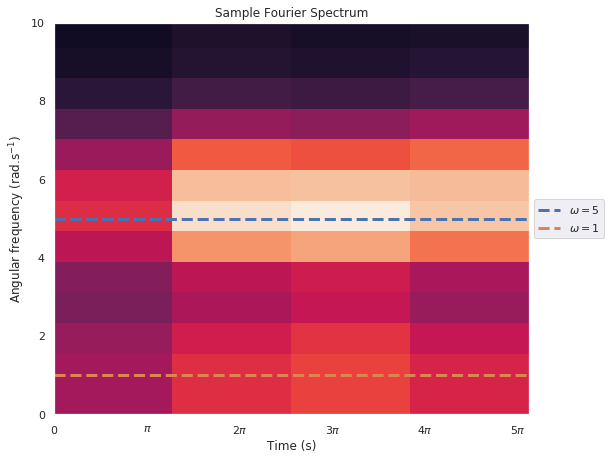

In [27]:
hilbert = Hilbert(time=time, time_series=time_series)
mwt_outputs = hilbert.morlet_wavelet_custom(adjust=False, window_width=512)
x_hs, y, z = mwt_outputs
z_min, z_max = 0, np.abs(z).max()

ax = plt.subplot(111)
plt.title('Sample Fourier Spectrum')
ax.pcolormesh(x_hs, y, np.abs(z), vmin=z_min, vmax=z_max)
ax.plot(x_hs, 5 * np.ones_like(x_hs), '--', label=r'$\omega = 5$', Linewidth=3)
ax.plot(x_hs, 1 * np.ones_like(x_hs), '--', label=r'$\omega = 1$', Linewidth=3)
ax.set_xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi, 5 * np.pi])
ax.set_xticklabels(['$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$', r'$5\pi$'])
plt.ylabel(r'Angular frequency (rad.s$^{-1}$)')
plt.ylim(0, 10)
plt.xlabel('Time (s)')
box_0 = ax.get_position()
ax.set_position([box_0.x0, box_0.y0 + 0.05, box_0.width * 0.85, box_0.height * 0.9])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Morlet Window Transform (MWT) with adjustable wavelet width

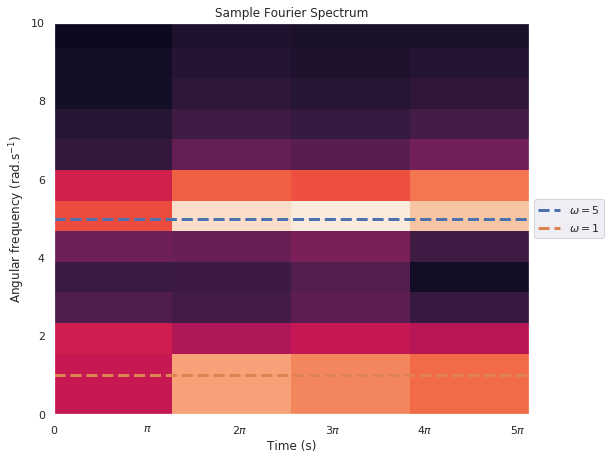

In [28]:
hilbert = Hilbert(time=time, time_series=time_series)
mwt_outputs = hilbert.morlet_wavelet_custom(adjust=True, window_width=512)
x_hs, y, z = mwt_outputs
z_min, z_max = 0, np.abs(z).max()

ax = plt.subplot(111)
plt.title('Sample Fourier Spectrum')
ax.pcolormesh(x_hs, y, np.abs(z), vmin=z_min, vmax=z_max)
ax.plot(x_hs, 5 * np.ones_like(x_hs), '--', label=r'$\omega = 5$', Linewidth=3)
ax.plot(x_hs, 1 * np.ones_like(x_hs), '--', label=r'$\omega = 1$', Linewidth=3)
ax.set_xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi, 5 * np.pi])
ax.set_xticklabels(['$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$', r'$5\pi$'])
plt.ylabel(r'Angular frequency (rad.s$^{-1}$)')
plt.ylim(0, 10)
plt.xlabel('Time (s)')
box_0 = ax.get_position()
ax.set_position([box_0.x0, box_0.y0 + 0.05, box_0.width * 0.85, box_0.height * 0.9])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

One can see that, despite the sensitivity of the instantaneous frequency to slight deviations, EMD far out performs traditional techniques in frequency resolution